You repeatedly roll a $d$ sided die and keep track of how many distinct faces of the die you have seen. $T_i$ is the number of additional rolls necessary to see the $i$ th face after having seen $i-1$ already. Show that $T_i$ follows a geometric distribution. What is its parameter $p$ ?

In [2]:
import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt

In [3]:
d = 4

In [4]:
def P_T(x, i):
    p = (d+1-i)/d
    return (1-p)** (x-1) * p


It can be shown that for a geometric distribution, expectation and variance are given by
\begin{equation*}
E[i]=\frac{1}{p}
\end{equation*}
and
\begin{equation*}
v(i)=\frac{1-p}{p^2}
\end{equation*}

In [5]:
def E(i):
    p = (d+1-i)/d
    return 1/p

def Var(i):
    p = (d+1-i)/d
    return (1-p) / p**2

In [6]:
E_tot, Var_tot = 0, 0
for i in range (1,d+1):
    # print("i = ", i)
    # print("E(X) = ", E(i))
    E_tot += E(i)
    # print("Var(X) = ", Var(i))
    Var_tot += Var(i)

In [7]:
print("E(X) = ", E_tot)
print("Var(X) = ", Var_tot)

E(X) =  8.333333333333332
Var(X) =  14.444444444444445


In [8]:
# simulate number of throws needed to see all faces, for 10000 times
simulation_size = 10000
import random

count_list = []
for i in range (simulation_size):
    seen = set()
    count = 0
    while len(seen) < d:
        count += 1
        seen.add(random.randint(1,d))
    count_list.append(count)

print ("E(X) = ", sum(count_list)/simulation_size)
print ("Var(X) = ", sum([(x-sum(count_list)/simulation_size)**2 for x in count_list])/simulation_size)


E(X) =  8.3904
Var(X) =  14.74758784


In [9]:
Ntoy = 100000
T_list = []
for i in range (Ntoy):
    # roll dice until all faces are seen
    seen = set()
    T = 0
    while len(seen) < d:
        T += 1
        seen.add(random.randint(1,d))
    T_list.append(T)

14.584738944450848
14.589885454465584


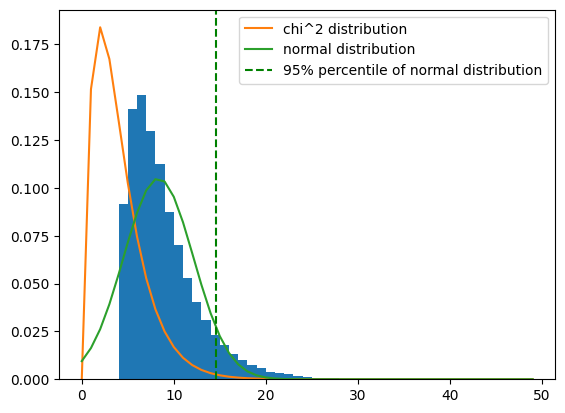

In [10]:
E_tot = 25/3
Var_tot = 130/9

#plot density distribution of T
plt.hist(T_list, bins = range(1,50), density=True)
# plot chi^2 distribution
x = np.arange(0, 50, 1)
plt.plot(x, chi2.pdf(x, d), label = "chi^2 distribution")  
# plot normal distribution
plt.plot(x, norm.pdf(x, E_tot, Var_tot**0.5), label = "normal distribution")
# plot the 95% percentile of normal distribution
print (E_tot + np.sqrt(Var_tot) * np.sqrt(2.71))
plt.axvline(x=norm.ppf(0.95, E_tot, Var_tot**0.5), color='g', linestyle='--', label = "95% percentile of normal distribution")
plt.legend()
plt.show()




In [11]:
# find the 95% confidence interval
T_list.sort()
print (T_list[int(Ntoy*0.95)])

16


In [12]:
print ((30-25/3)/(np.sqrt(130/9)))

5.700877125495689
